In [1]:
import pandas as pd
import numpy as np

##Reading the dataset

In [2]:
df=pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [3]:

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

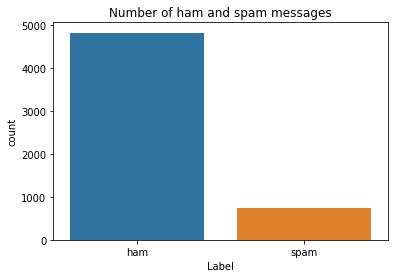

In [10]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

##Creating model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [16]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [18]:
X_train.tail()

212                               K:)k:)good:)study well.
1652    For ur chance to win a å£250 cash every wk TXT...
1208                      Also maaaan are you missing out
1680                                   Okay... We wait ah
3608    Joy's father is John. Then John is the ____ of...
Name: v2, dtype: object

##Adding layers

In [19]:
from keras_preprocessing.sequence import pad_sequences

In [20]:
from keras import preprocessing
import keras
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [21]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

##Compiling the model

In [22]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

##Fitting the model

In [23]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 13s 261ms/step - loss: 0.3333 - accuracy: 0.8675 - val_loss: 0.2139 - val_accuracy: 0.9757
Epoch 2/10
30/30 [==============================] - 7s 243ms/step - loss: 0.0888 - accuracy: 0.9762 - val_loss: 0.0604 - val_accuracy: 0.9821


##Testing the model

In [24]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [25]:
print(test_sequences)

[[414, 479, 19, 36, 27, 646, 27, 178, 119, 2, 37, 9, 28, 112, 210, 425], [135, 794, 3, 344, 346, 19, 613, 486, 286, 5, 7, 30, 5, 3, 137, 10, 4, 7, 78, 137, 3, 73], [138, 25, 1, 92, 194, 1, 80, 3, 368, 398], [3, 448, 11, 64, 27, 17, 4, 123, 64, 121], [228, 4, 98, 32, 47, 697, 2, 34, 88, 79, 34, 608, 282, 2, 935, 2], [1, 3, 43, 71, 210], [3, 84, 28, 5, 613], [72, 4, 3, 22, 511, 2, 374, 4, 556, 31, 14, 2, 13, 79, 5, 328, 46, 2, 35, 2, 125, 189, 134], [315, 27, 3, 55, 733, 42, 41, 26, 457, 2, 198, 97, 510, 7, 159, 21, 33, 39, 100, 31, 4, 810, 15, 61, 36, 45, 51, 113], [124, 731, 17, 13, 217, 18, 218, 277, 5, 18, 13, 20, 339, 4, 20, 45, 122, 147, 201], [215, 21, 66, 1, 641, 176, 66], [897, 466, 287, 56, 722, 492, 349, 24, 10, 11, 56, 157, 466, 25, 1, 255, 258, 69, 8, 719, 112, 715, 797, 456, 694, 78, 53], [92, 500, 122, 64, 187, 330, 60, 499, 59, 339, 760], [11, 1, 70, 3, 2, 103, 20, 26, 156, 15, 614, 87, 9, 925, 18, 13, 107, 925], [59, 1, 198], [25, 1, 377, 37, 47, 217, 415], [9, 246, 697,

In [26]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 35ms/step - loss: 0.0478 - accuracy: 0.9856


In [27]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.048
  Accuracy: 0.986


In [28]:
import pickle

In [29]:
filename= "my_model"
with open(filename, 'wb') as file:  
    pickle.dump(model, file)